This code processes chlorophyll data from NJDEP. A file containing all data is 100MB.

The final processed code is analyzed in file 2.2 Chl Analysis and Model.

http://njdep.rutgers.edu/aircraft/

In [12]:
import numpy as np
import pandas as pd
import datetime
import urllib.request
import netCDF4
from netCDF4 import Dataset
import xarray as xr
import matplotlib.pyplot as plt

In [13]:
# Parse turns the data into Datetime format.
# Index sets the date as the index - this step is important in later data condensing.
njdep = pd.read_csv('./NJDEPaircraftData20070101_To_20191001.txt',parse_dates=['date'], index_col='date')
njdep = njdep.drop('id', axis=1)
njdep = njdep.drop('time', axis=1)
njdep.head(10)

,lat,lng,chlora
date,,,
2007-05-21,40.463245,-74.235184,2.117404
2007-05-21,40.462158,-74.234329,1.384279
2007-05-21,40.461193,-74.233322,1.429075
2007-05-21,40.460308,-74.232178,1.494683
2007-05-21,40.459473,-74.230965,1.515220
2007-05-21,40.458725,-74.229668,1.678402
2007-05-21,40.458012,-74.228325,1.391031
2007-05-21,40.457371,-74.226936,1.541263
2007-05-21,40.456776,-74.225525,1.407845


In [14]:
# NJ is around 40 N/S and -74 E/W
# must trim out some bad data
njdep = njdep[njdep.lat>38.5]

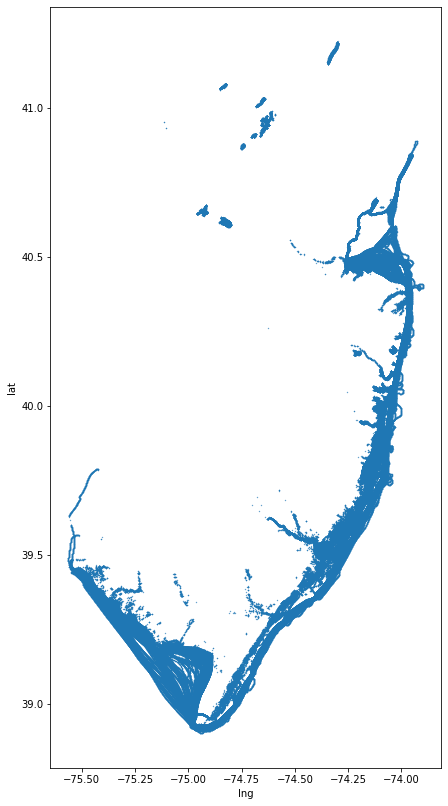

In [15]:
# This code plots a map of all points along New Jersey, but it takes a long time to process
# figure displays 3.5 deg n/s and 2 deg e/w
njdep.plot.scatter('lng','lat',figsize=(7, 14), s=0.1)

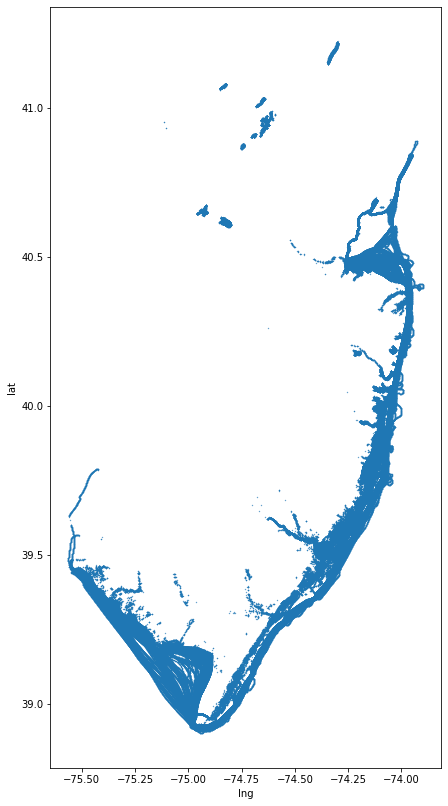

In [36]:
subset = njdep.copy()

# This code redefines our dataframe to be only this subset of the delbay
north = 40.6
# south = 39.05
east = -74.2
# west = -75.1

totalCoast = subset[~((subset.lat>north) & (subset.lat<east))]
# subset = subset[(subset.lat<north)]

totalCoast.plot.scatter('lng','lat',figsize=(7, 14), s=0.1)

In [17]:
# This creates a new dataframe where the all the data points from a single day are averaged into a single point. 
# This may be a little heavy-handed
totalCoast = totalCoast.resample('D').mean()
totalCoast

,lat,lng,chlora
date,,,
2007-05-21,40.161291,-74.050162,5.987037
2007-05-22,40.164062,-74.050194,8.587719
2007-05-23,NaN,NaN,NaN
2007-05-24,39.606933,-74.358576,3.059810
2007-05-25,40.155024,-74.048262,9.829573
...,...,...,...
2019-09-27,39.983526,-74.109322,11.549462
2019-09-28,39.982936,-74.107366,11.979423
2019-09-29,39.622248,-74.411435,11.089664


In [18]:
# Drop all the NaN values
totalCoast = totalCoast.dropna(axis=0,how="any")
totalCoast

,lat,lng,chlora
date,,,
2007-05-21,40.161291,-74.050162,5.987037
2007-05-22,40.164062,-74.050194,8.587719
2007-05-24,39.606933,-74.358576,3.059810
2007-05-25,40.155024,-74.048262,9.829573
2007-05-29,40.137186,-74.058339,16.482273
...,...,...,...
2019-09-26,39.517391,-74.452927,10.619918
2019-09-27,39.983526,-74.109322,11.549462
2019-09-28,39.982936,-74.107366,11.979423


In [19]:
# If you look at the headers of the previous tables, you will see that the column names aren't aligned correctly.
# Alignment is necessary to call the column data. Resetting the index corrects the formatting, but changes the index.
totalCoast = totalCoast.reset_index()
totalCoast

,date,lat,lng,chlora
0,2007-05-21,40.161291,-74.050162,5.987037
1,2007-05-22,40.164062,-74.050194,8.587719
2,2007-05-24,39.606933,-74.358576,3.059810
3,2007-05-25,40.155024,-74.048262,9.829573
4,2007-05-29,40.137186,-74.058339,16.482273
...,...,...,...,...
815,2019-09-26,39.517391,-74.452927,10.619918
816,2019-09-27,39.983526,-74.109322,11.549462
817,2019-09-28,39.982936,-74.107366,11.979423
818,2019-09-29,39.622248,-74.411435,11.089664


In [27]:
totalCoast = totalCoast[totalCoast['chlora']<1000]

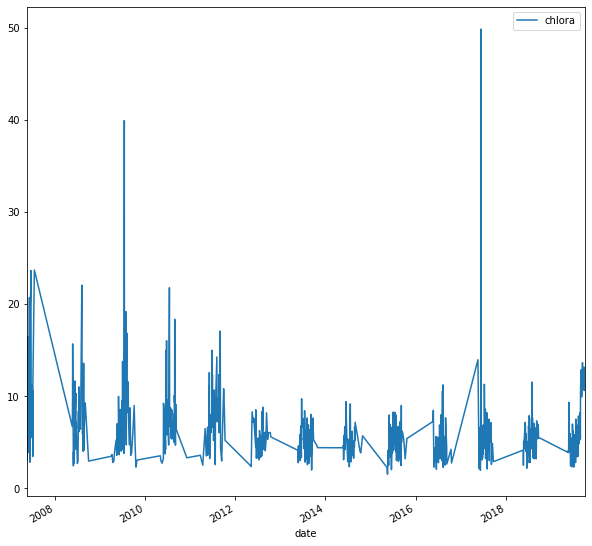

In [28]:
plot1 = totalCoast.plot('date','chlora',figsize=(10, 10)) #style='.'


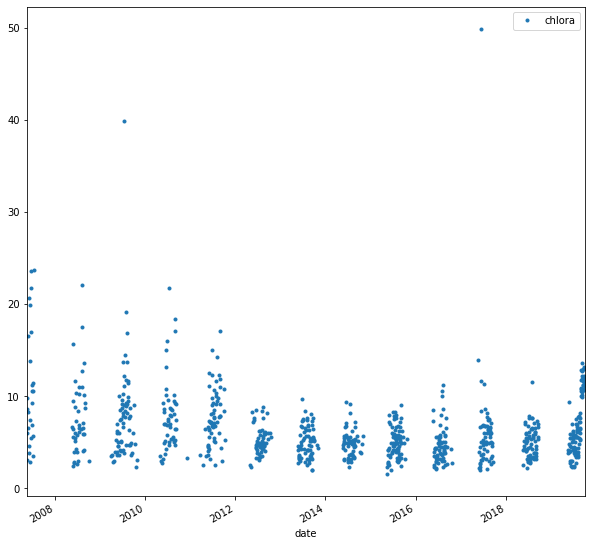

In [29]:
plot2 = totalCoast.plot('date','chlora',figsize=(10, 10), style='.') #

(735964.0, 736695.0)

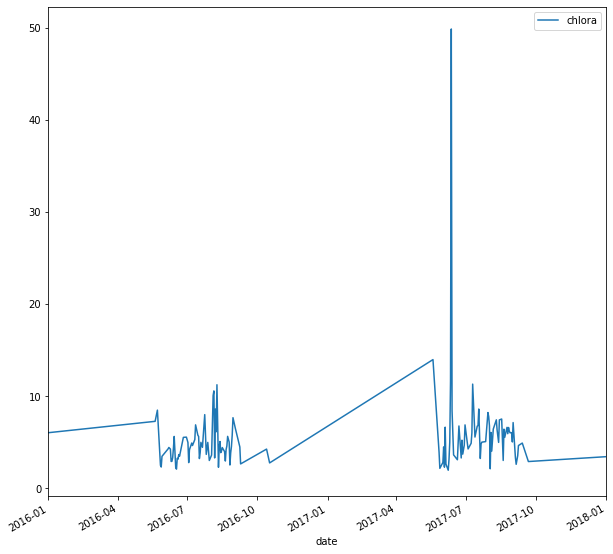

In [30]:
plot1 = totalCoast.plot('date','chlora',figsize=(10, 10)) #style='.'
plot1.set_xlim(pd.Timestamp('2016-01-01'), pd.Timestamp('2018-01-01'))

(736450.0, 736603.0)

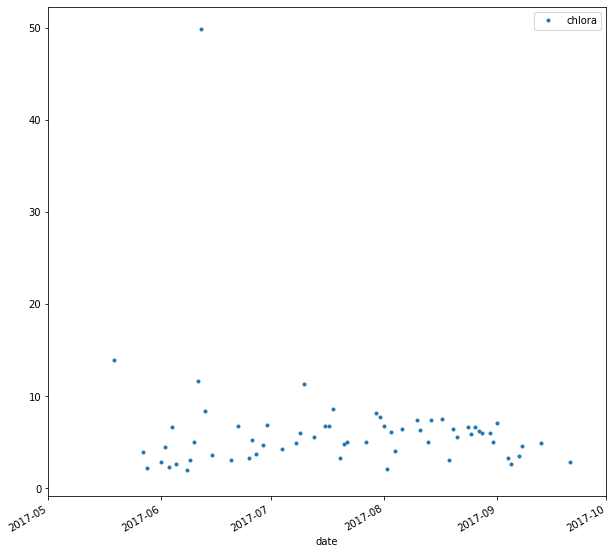

In [31]:
plot1 = totalCoast.plot('date','chlora',figsize=(10, 10),style='.') #style='.'
plot1.set_xlim(pd.Timestamp('2017-05-01'), pd.Timestamp('2017-10-01'))

In [32]:
totalCoast.size

3276

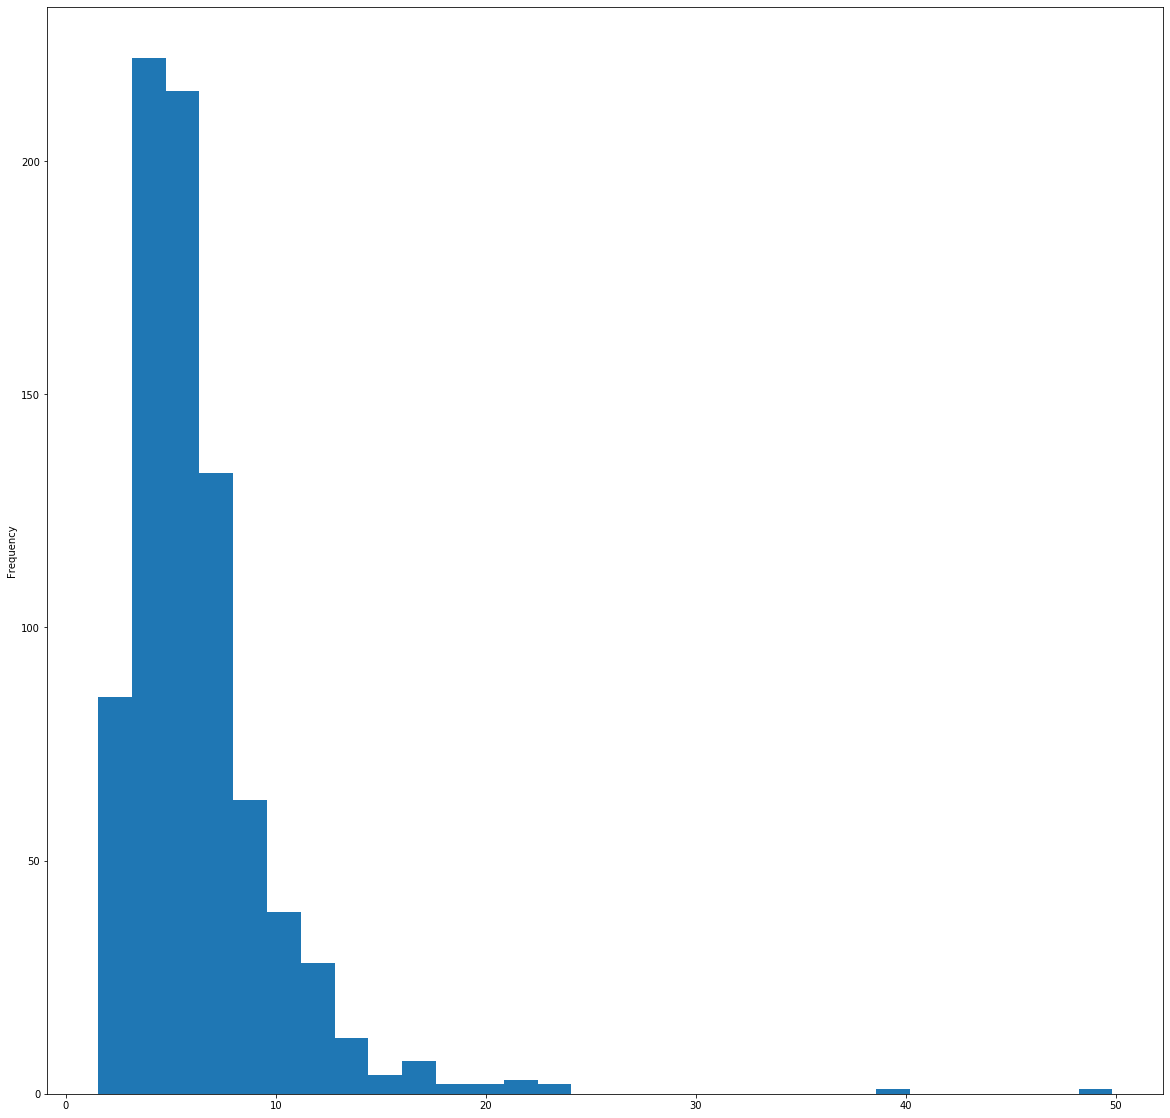

In [34]:
totalCoast['chlora'].plot.hist(bins=30, figsize=(20, 20))